# 1. train.csv

- colums : ImageId, EncodedPixels, Height, Width, ClassId, AttributesIds
    - ImageId       : train/"ImageId".jpg 로 이미지를 불러 올 수 있다.
    - EncodedPixels : pixel의 시작지점과 pixel의 지속 점 갯수가 연속해서 적혀있다. 
    - Height : Image의 높이
    - Width : Image의 넓이
    - ClassId : fashion item id ex) 셔츠, 바지 등등
    - AttributesIds : fashion item의 특징 ex) 소매의 길이, 바지의 길이 등등

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd
import numpy as np
import json

In [2]:
train_df = pd.read_csv('train.csv')
with open('label_descriptions.json', 'r') as file:
    label_desc = json.load(file)

sample_sub_df = pd.read_csv('sample_submission.csv')

In [3]:
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [4]:
print(f'# of images in training set: {train_df["ImageId"].nunique()}')
print(f'# of images in test set: {sample_sub_df["ImageId"].nunique()}')

# of images in training set: 45623
# of images in test set: 3200


### Check Images size distribution

In [5]:
pd.DataFrame([train_df['Height'].describe(), train_df['Width'].describe()]).T.loc[['max', 'min', 'mean']]

,Height,Width
max,8688.000000,10717.00000
min,296.000000,151.00000
mean,2235.524021,1761.97925


In [6]:
image_shape_df = train_df.groupby("ImageId")['Height', 'Width'].first()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


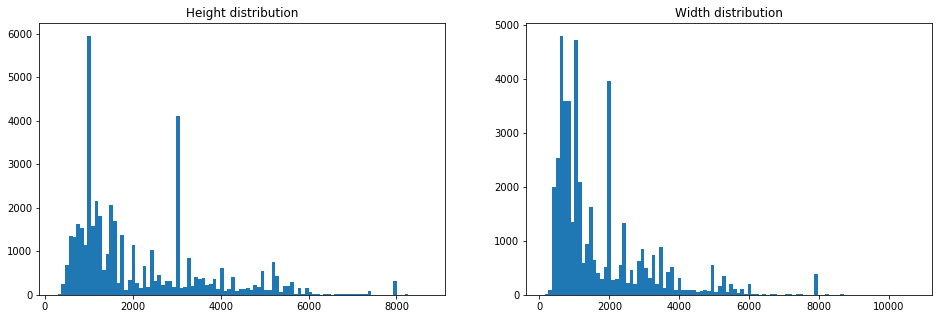

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.hist(image_shape_df['Height'], bins=100)
ax1.set_title("Height distribution")
ax2.hist(image_shape_df['Width'], bins=100)
ax2.set_title("Width distribution")
plt.show()